In [1]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='D:/Backup_data/jongkeun/dir_images/traindata/', target_size=(128,128))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='D:/Backup_data/jongkeun/dir_images/testdata/', target_size=(128,128))

Found 9182 images belonging to 3 classes.
Found 1018 images belonging to 3 classes.


In [3]:
model = Sequential()

W0107 14:39:09.721889  6596 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [4]:
model.add(Conv2D(input_shape=(128,128,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

W0107 14:39:10.594562  6596 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0107 14:39:10.604536  6596 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0107 14:39:10.632461  6596 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [5]:
from keras.optimizers import Adam
opt = Adam(lr=1e-5)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

W0107 14:39:11.286739  6596 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0107 14:39:11.292723  6596 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)       295168    
__________

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("191118_vgg16", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='acc', patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=500,callbacks=[checkpoint, early])

W0107 14:39:12.402726  6596 deprecation.py:323] From C:\Users\whdrm\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0107 14:39:12.509441  6596 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/500
100/100 [==============================] - 138s 1s/step - loss: 0.6892 - acc: 0.6991 - val_loss: 0.5048 - val_acc: 0.7969

Epoch 00001: val_acc improved from -inf to 0.79688, saving model to 191118_vgg16
Epoch 2/500
100/100 [==============================] - 104s 1s/step - loss: 0.5692 - acc: 0.7556 - val_loss: 0.4988 - val_acc: 0.7906

Epoch 00002: val_acc did not improve from 0.79688
Epoch 3/500
100/100 [==============================] - 85s 854ms/step - loss: 0.5660 - acc: 0.7461 - val_loss: 0.4418 - val_acc: 0.7969

Epoch 00003: val_acc did not improve from 0.79688
Epoch 4/500
100/100 [==============================] - 45s 447ms/step - loss: 0.5391 - acc: 0.7694 - val_loss: 0.4633 - val_acc: 0.8344

Epoch 00004: val_acc improved from 0.79688 to 0.83439, saving model to 191118_vgg16
Epoch 5/500
100/100 [==============================] - 44s 439ms/step - loss: 0.5028 - acc: 0.7941 - val_loss: 0.4454 - val_acc: 0.8031

Epoch 00005: val_acc did not improve from 0.83439
Epoc


Epoch 00042: val_acc did not improve from 0.94375
Epoch 43/500
100/100 [==============================] - 44s 443ms/step - loss: 0.1981 - acc: 0.9256 - val_loss: 0.2625 - val_acc: 0.9156

Epoch 00043: val_acc did not improve from 0.94375
Epoch 44/500
100/100 [==============================] - 44s 443ms/step - loss: 0.1496 - acc: 0.9434 - val_loss: 0.2546 - val_acc: 0.9156

Epoch 00044: val_acc did not improve from 0.94375
Epoch 45/500
100/100 [==============================] - 44s 444ms/step - loss: 0.1350 - acc: 0.9513 - val_loss: 0.2865 - val_acc: 0.8981

Epoch 00045: val_acc did not improve from 0.94375
Epoch 46/500
100/100 [==============================] - 44s 444ms/step - loss: 0.1753 - acc: 0.9340 - val_loss: 0.2601 - val_acc: 0.9219

Epoch 00046: val_acc did not improve from 0.94375
Epoch 47/500
100/100 [==============================] - 44s 444ms/step - loss: 0.1156 - acc: 0.9591 - val_loss: 0.2435 - val_acc: 0.9156

Epoch 00047: val_acc did not improve from 0.94375
Epoch 48/

100/100 [==============================] - 44s 445ms/step - loss: 0.0830 - acc: 0.9712 - val_loss: 0.3194 - val_acc: 0.9156

Epoch 00086: val_acc did not improve from 0.94375
Epoch 87/500
100/100 [==============================] - 46s 458ms/step - loss: 0.0280 - acc: 0.9925 - val_loss: 0.2912 - val_acc: 0.9268

Epoch 00087: val_acc did not improve from 0.94375
Epoch 88/500
100/100 [==============================] - 44s 445ms/step - loss: 0.0125 - acc: 0.9959 - val_loss: 0.6536 - val_acc: 0.8656

Epoch 00088: val_acc did not improve from 0.94375
Epoch 89/500
100/100 [==============================] - 45s 454ms/step - loss: 0.0602 - acc: 0.9784 - val_loss: 0.3613 - val_acc: 0.9062

Epoch 00089: val_acc did not improve from 0.94375
Epoch 90/500
100/100 [==============================] - 46s 456ms/step - loss: 0.0074 - acc: 0.9988 - val_loss: 0.4526 - val_acc: 0.8949

Epoch 00090: val_acc did not improve from 0.94375
Epoch 91/500
100/100 [==============================] - 46s 459ms/step - 

In [10]:
image_resize = 128
image_width = image_resize
image_height = image_resize
home_dir = "D:/Backup_data/jongkeun"
test_image_file = "/dir_images/190309_new_test/"

In [11]:
import numpy as np
import re
import cv2
from PIL import Image as PI

In [12]:
test_image_dir = home_dir + test_image_file
test_image_list = os.listdir(test_image_dir)
test_image_list = sorted(test_image_list, key=lambda y: (int(re.sub('\D','',y)),y))
test_image_array = []

for j in range(len(test_image_list)) :
    test_image_list[j] = test_image_dir + test_image_list[j]
    img = cv2.imread(test_image_list[j])
    img2 = cv2.resize(img, (128,128))
    test_image_array.append(np.array(img2))
    
test_image_array = np.reshape(test_image_array, [-1, image_width*image_height*3])
test_image_array = np.array(np.reshape(test_image_array, [-1, image_width, image_height, 3]), dtype=np.float32)

In [42]:
output = model.predict(test_image_array, verbose=1)

1018/1018 [==============================] - 4s 4ms/step


In [43]:
print(output)

[[0.999 0.000 0.001]
 [0.997 0.002 0.001]
 [0.846 0.077 0.078]
 ...
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]]


In [18]:
output = model.predict_generator(testdata, steps=10, verbose=1)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
noc = testdata.classes
print(noc)
print(output)

10/10 [==============================] - 4s 392ms/step
[0 0 0 ... 2 2 2]
[[0.995 0.005 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.020 0.011 0.970]
 [0.893 0.001 0.106]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.001 0.999]
 [0.992 0.000 0.008]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.002 0.000 0.998]
 [0.000 0.000 0.999]
 [0.393 0.088 0.520]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.006 0.000 0.994]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1

In [12]:
print(len(noc))

NameError: name 'noc' is not defined

In [74]:
print(len(output))

1018


In [38]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [39]:
def getParam(arr, threshold) :
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    
    predT = [0 for col in range(len(arr))]
    
    for i in range(len(arr)) :
        if arr[i][1] > threshold or arr[i][2] >= threshold :
            predT[i] = 1

    for i in range(len(arr)) :
        if i < 349 :
            if predT[i] == 1 :
                fp += 1
            else :
                tn += 1
        else :
            if predT[i] == 1 :
                tp += 1
            else :
                fn += 1
                
    return [tp, fp, fn, tn]

In [48]:
def getParam_(arr, threshold) :
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    
    predF = [0 for col in range(len(arr))]
    
    for i in range(len(arr)) :
        if arr[i][0] >= threshold :
            predF[i] = 1
            
    for i in range(len(arr)) :
        if i > 348 :
            if predF[i] == 1 :
                fp += 1
            else :
                tn += 1
        else :
            if predF[i] == 1 :
                tp += 1
            else :
                fn += 1
                
    return [tp, fp, fn, tn]

In [44]:
tpr = [0]
tpr_ = [0]

fpr = [0]
fpr_ = [0]

result = 0
result_ = 0

for i in range(101) :
    result = getParam(output, i*0.01)
    result_ = getParam_(output, i*0.01)
    
    tpr.append(result[0]/(result[0]+result[2]))
    tpr_.append(result_[0]/(result_[0]+result_[2]))
    
    fpr.append(result[1]/(result[1]+result[3]))
    fpr_.append(result_[1]/(result_[1]+result_[3]))
    
fpr.sort()
fpr_.sort()

tpr.sort()
tpr_.sort()

In [53]:
result = getParam(output, 0.5)
result

[645, 63, 24, 286]

In [49]:
result = getParam_(output, 0.5)
result

[282, 24, 67, 645]

In [17]:
print("auc_abnormal: ", metrics.auc(fpr, tpr))
print("auc_normal: ", metrics.auc(fpr_, tpr_))

auc_abnormal:  0.9601166690223187
auc_normal:  0.9623588214886865


In [19]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  # warning 출력 방지
from keras.applications.resnet50 import ResNet50, decode_predictions

In [20]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [21]:
input = Input(shape=(128,128,3))
resnet = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')
resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [22]:
x = resnet.output
x = Dense(1024, init='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(3, activation='softmax')(x)

resnet = Model(resnet.input, x)
resnet.summary()

C:\Users\whdrm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, kernel_initializer="uniform")`
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [23]:
from keras.preprocessing.image import ImageDataGenerator
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='D:/Backup_data/jongkeun/dir_images/traindata/', target_size=(128,128))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='D:/Backup_data/jongkeun/dir_images/testdata/', target_size=(128,128))

Found 9182 images belonging to 3 classes.
Found 1018 images belonging to 3 classes.


In [24]:
from keras.optimizers import Adam
opt = Adam(lr=1e-5)
resnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("191118_resnet50", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', patience=20, verbose=1, mode='min')
hist = resnet.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=500,callbacks=[checkpoint, early])

Epoch 1/500
100/100 [==============================] - 56s 560ms/step - loss: 1.2420 - acc: 0.4062 - val_loss: 1.0033 - val_acc: 0.5094

Epoch 00001: val_acc improved from -inf to 0.50938, saving model to 191118_resnet50
Epoch 2/500
100/100 [==============================] - 42s 420ms/step - loss: 1.0268 - acc: 0.5037 - val_loss: 1.0777 - val_acc: 0.5031

Epoch 00002: val_acc did not improve from 0.50938
Epoch 3/500
100/100 [==============================] - 48s 476ms/step - loss: 0.9267 - acc: 0.5541 - val_loss: 0.9054 - val_acc: 0.5531

Epoch 00003: val_acc improved from 0.50938 to 0.55312, saving model to 191118_resnet50
Epoch 4/500
100/100 [==============================] - 46s 456ms/step - loss: 0.8592 - acc: 0.6038 - val_loss: 0.9369 - val_acc: 0.5987

Epoch 00004: val_acc improved from 0.55312 to 0.59873, saving model to 191118_resnet50
Epoch 5/500
100/100 [==============================] - 44s 439ms/step - loss: 0.8178 - acc: 0.6306 - val_loss: 0.8126 - val_acc: 0.5875

Epoch 0

### =========================================================================

In [46]:
output_res = resnet.predict(test_image_array, verbose=1)

1018/1018 [==============================] - 5s 5ms/step


In [47]:
result_ = getParam(output_res, 0.5)
result_

[495, 46, 174, 303]

In [51]:
result_ = getParam_(output_res, 0.5)
result_

[222, 63, 127, 606]

In [26]:
tpr_res = [0]
tpr_res_ = [0]

fpr_res = [0]
fpr_res_ = [0]

result_res = 0
result_res_ = 0

for i in range(101) :
    result_res = getParam(output_res, i*0.01)
    result_res_ = getParam_(output_res, i*0.01)
    
    tpr_res.append(result_res[0]/(result_res[0]+result_res[2]))
    tpr_res_.append(result_res_[0]/(result_res_[0]+result_res_[2]))
    
    fpr_res.append(result_res[1]/(result_res[1]+result_res[3]))
    fpr_res_.append(result_res_[1]/(result_res_[1]+result_res_[3]))
    
fpr_res.sort()
fpr_res_.sort()

tpr_res.sort()
tpr_res_.sort()

In [27]:
print("auc_abnormal: ", metrics.auc(fpr_res, tpr_res))
print("auc_normal: ", metrics.auc(fpr_res_, tpr_res_))

auc_abnormal:  0.8988097532561536
auc_normal:  0.9024353159357721


In [28]:
# dogs & cats 16 conv.
pred_list = [[0.8550839, 0.02433403, 0.12058208], [0.93155086, 0.023091994, 0.045357123], [0.6064808, 0.07595143, 0.31756774], [0.8049942, 0.15170033, 0.043305527], [0.9310309, 0.046784665, 0.022184378], [0.7114639, 0.057208415, 0.23132765], [0.737086, 0.019443775, 0.24347024], [0.91781443, 0.030932264, 0.051253244], [0.9071993, 0.00630453, 0.08649613], [0.8562902, 0.05192993, 0.09177984], [0.79184544, 0.02886922, 0.17928539], [0.7999655, 0.06740565, 0.13262878], [0.80253637, 0.030325722, 0.16713786], [0.89187473, 0.007361247, 0.100764036], [0.9071038, 0.007032554, 0.08586365], [0.94532216, 0.01082957, 0.043848287], [0.73131645, 0.050834734, 0.21784875], [0.9055954, 0.018310804, 0.076093785], [0.8698312, 0.042090446, 0.08807835], [0.690687, 0.053544004, 0.25576904], [0.94336754, 0.03678138, 0.019851163], [0.5205585, 0.33014688, 0.14929463], [0.8910589, 0.030676385, 0.078264646], [0.96063954, 0.01388984, 0.025470681], [0.9237419, 0.032253552, 0.04400464], [0.9245817, 0.011977259, 0.06344104], [0.77217364, 0.035726998, 0.19209935], [0.97629887, 0.0029478762, 0.0207532], [0.8767398, 0.010611086, 0.11264911], [0.7847712, 0.028492337, 0.18673643], [0.8891517, 0.008302562, 0.102545746], [0.6731362, 0.0809697, 0.2458941], [0.87394816, 0.005108474, 0.120943345], [0.87475324, 0.009100774, 0.1161459], [0.90425974, 0.041903, 0.05383729], [0.8960183, 0.023878047, 0.08010358], [0.8961511, 0.048474275, 0.055374693], [0.92277026, 0.015587238, 0.06164246], [0.7619312, 0.11440555, 0.123663194], [0.96278346, 0.004146918, 0.03306955], [0.6796627, 0.1256893, 0.19464798], [0.9325144, 0.028366722, 0.039118852], [0.6820466, 0.042865966, 0.2750875], [0.8553849, 0.10794128, 0.036673833], [0.5650531, 0.15685515, 0.2780918], [0.5534401, 0.3603783, 0.08618161], [0.9218122, 0.015577597, 0.06261019], [0.91963494, 0.00603002, 0.07433503], [0.93419856, 0.020789858, 0.045011528], [0.41228577, 0.32466516, 0.26304907], [0.8426703, 0.014999017, 0.14233065], [0.5090879, 0.060219847, 0.4306922], [0.88038266, 0.018721757, 0.100895606], [0.779388, 0.12779272, 0.09281928], [0.9418532, 0.01167193, 0.046474885], [0.70776224, 0.032881353, 0.2593564], [0.9206486, 0.0043694465, 0.07498197], [0.74712807, 0.13177413, 0.12109783], [0.94187444, 0.0113058025, 0.046819724], [0.9314497, 0.012896686, 0.05565369], [0.9118236, 0.04638382, 0.04179259], [0.78576756, 0.081500106, 0.13273223], [0.8632464, 0.06002238, 0.07673129], [0.9398992, 0.021789214, 0.03831151], [0.9402986, 0.0062572933, 0.053444006], [0.7074324, 0.059929397, 0.23263824], [0.53250456, 0.12011482, 0.34738067], [0.84609014, 0.075940594, 0.07796935], [0.8186754, 0.09098807, 0.090336554], [0.9365541, 0.01171567, 0.051730305], [0.8757697, 0.07594822, 0.048282124], [0.9287657, 0.003872225, 0.0673621], [0.5912136, 0.22180462, 0.18698177], [0.91346025, 0.00667326, 0.07986647], [0.9228085, 0.026866907, 0.050324664], [0.9756487, 0.009374054, 0.014977239], [0.9584162, 0.009622454, 0.031961385], [0.97374016, 0.0042117815, 0.02204798], [0.8882103, 0.015571414, 0.096218295], [0.9438582, 0.0022316463, 0.05391008], [0.959244, 0.011062911, 0.029693073], [0.8193981, 0.008224623, 0.17237726], [0.87757134, 0.077463806, 0.04496484], [0.88212913, 0.0046684276, 0.113202445], [0.9540535, 0.019806018, 0.026140554], [0.7766571, 0.045347303, 0.1779957], [0.11087181, 0.84221435, 0.046913885], [0.64447254, 0.11667849, 0.23884895], [0.89443874, 0.031299982, 0.07426126], [0.965217, 0.017807843, 0.016975187], [0.8763101, 0.094694346, 0.02899552], [0.92465544, 0.008221907, 0.0671227], [0.87544614, 0.057539556, 0.067014284], [0.2949444, 0.34863573, 0.35641983], [0.8569724, 0.029859273, 0.113168396], [0.7924172, 0.026132219, 0.18145062], [0.95578986, 0.009455265, 0.034754902], [0.96529526, 0.0051800855, 0.029524643], [0.6776746, 0.08641258, 0.23591277], [0.9646308, 0.0036689313, 0.03170025], [0.76932263, 0.14602, 0.08465731], [0.5809712, 0.1921938, 0.22683504], [0.828175, 0.040002815, 0.13182215], [0.8621058, 0.069973126, 0.06792111], [0.9177411, 0.003642916, 0.07861597], [0.8193415, 0.011630034, 0.1690285], [0.8587415, 0.010851364, 0.13040718], [0.72966117, 0.15967186, 0.11066699], [0.97135454, 0.007791286, 0.020854287], [0.6248991, 0.17728058, 0.19782035], [0.8639358, 0.046069723, 0.08999436], [0.83604634, 0.036476295, 0.1274774], [0.892569, 0.037209813, 0.070221215], [0.94596684, 0.009080146, 0.0449529], [0.8861669, 0.05763699, 0.056196097], [0.64728504, 0.04275483, 0.30996013], [0.8119864, 0.060850985, 0.12716258], [0.8384376, 0.09144614, 0.07011626], [0.8913398, 0.02887823, 0.07978203], [0.27797082, 0.6395679, 0.0824613], [0.9261075, 0.027474314, 0.046418175], [0.7302241, 0.15532993, 0.11444609], [0.9162032, 0.0061966926, 0.07760006], [0.7387194, 0.07402199, 0.18725853], [0.21958625, 0.6651766, 0.11523725], [0.9325251, 0.011611356, 0.05586349], [0.83622867, 0.08007941, 0.083691835], [0.8092244, 0.07187008, 0.118905455], [0.8614752, 0.0037103638, 0.13481437], [0.8863306, 0.012735463, 0.10093386], [0.61694777, 0.31924808, 0.06380415], [0.8569364, 0.036106706, 0.10695689], [0.9320043, 0.008057806, 0.059937946], [0.8176045, 0.01682414, 0.16557142], [0.9068351, 0.008623053, 0.084541894], [0.4633171, 0.2531726, 0.28351027], [0.27689478, 0.6742371, 0.04886822], [0.8351496, 0.051178873, 0.113671556], [0.68584055, 0.18718794, 0.1269715], [0.9332005, 0.0074072434, 0.059392318], [0.89550906, 0.032164022, 0.07232688], [0.80162203, 0.051058255, 0.14731978], [0.5448124, 0.32653356, 0.12865406], [0.5750799, 0.14220732, 0.28271276], [0.97431767, 0.0019898564, 0.023692518], [0.8473761, 0.05619978, 0.09642414], [0.96124816, 0.010428251, 0.028323624], [0.94481385, 0.0011898743, 0.053996295], [0.94552565, 0.009770248, 0.044704046], [0.89166844, 0.007797775, 0.10053378], [0.9140551, 0.038997672, 0.046947245], [0.21804154, 0.6177871, 0.16417138], [0.8449119, 0.08119029, 0.07389786], [0.91199136, 0.013131522, 0.07487717], [0.25218612, 0.4779656, 0.26984832], [0.8827657, 0.008374397, 0.108859956], [0.69961154, 0.058950413, 0.24143808], [0.8375787, 0.12326556, 0.039155755], [0.9031362, 0.051618468, 0.04524538], [0.49851063, 0.23836625, 0.26312315], [0.42225596, 0.33264723, 0.24509685], [0.84093726, 0.013363757, 0.145699], [0.6467565, 0.2194439, 0.13379964], [0.42979217, 0.35144076, 0.21876703], [0.89481443, 0.019529272, 0.085656315], [0.92105705, 0.022149017, 0.05679401], [0.870369, 0.047399573, 0.08223134], [0.82356197, 0.03760829, 0.13882975], [0.37360224, 0.5234882, 0.10290953], [0.9798448, 0.0013456474, 0.018809656], [0.9016271, 0.085267454, 0.013105423], [0.9502106, 0.0076262997, 0.042163175], [0.5779801, 0.32107112, 0.10094872], [0.53519017, 0.13548526, 0.3293245], [0.9553604, 0.019377984, 0.02526152], [0.7726644, 0.10046252, 0.12687309], [0.8222876, 0.018529864, 0.1591826], [0.96124727, 0.011715208, 0.027037488], [0.4962804, 0.3522831, 0.15143643], [0.9539705, 0.0081467405, 0.037882756], [0.867195, 0.014590041, 0.118214935], [0.8136041, 0.058808587, 0.1275873], [0.56707644, 0.38081196, 0.05211164], [0.89175534, 0.01913381, 0.08911078], [0.9441607, 0.014433457, 0.041405857], [0.92474055, 0.012131182, 0.06312824], [0.9477126, 0.0084059695, 0.043881375], [0.6240558, 0.1302934, 0.24565078], [0.97049683, 0.0050196825, 0.024483537], [0.91790026, 0.016863972, 0.065235734], [0.9842795, 0.0027640942, 0.012956421], [0.63358676, 0.1980106, 0.16840263], [0.6473075, 0.10108425, 0.25160822], [0.9048526, 0.007075184, 0.08807225], [0.6730875, 0.18619949, 0.14071296], [0.90368366, 0.0038600247, 0.092456326], [0.9149442, 0.015916662, 0.069139145], [0.5259844, 0.33558977, 0.13842583], [0.847486, 0.054377787, 0.09813621], [0.80156463, 0.07575834, 0.12267706], [0.5831798, 0.22559017, 0.1912301], [0.8816579, 0.030159382, 0.08818277], [0.8115764, 0.011725247, 0.17669837], [0.8911434, 0.008924153, 0.099932484], [0.4020891, 0.45558444, 0.14232643], [0.3020896, 0.64922845, 0.04868192], [0.9550285, 0.010028772, 0.03494273], [0.3315396, 0.62590426, 0.04255617], [0.92903537, 0.007038649, 0.06392588], [0.8983216, 0.019929735, 0.08174862], [0.75743705, 0.026214248, 0.21634862], [0.8031896, 0.134337, 0.062473435], [0.8982671, 0.00801199, 0.09372093], [0.96260846, 0.0032996247, 0.034092005], [0.88152575, 0.062246002, 0.056228183], [0.806365, 0.09761624, 0.09601876], [0.891196, 0.008704804, 0.100099236], [0.9142648, 0.0124510685, 0.07328416], [0.96856874, 0.010396339, 0.021034898], [0.67168325, 0.0933145, 0.23500219], [0.35951188, 0.18717358, 0.45331457], [0.88036233, 0.027759548, 0.09187819], [0.90236765, 0.008764925, 0.08886736], [0.05697166, 0.9298821, 0.0131461825], [0.850253, 0.09938484, 0.05036218], [0.8420855, 0.10558948, 0.052325103], [0.87086535, 0.039262094, 0.08987251], [0.94037944, 0.027494889, 0.03212561], [0.93504536, 0.015494069, 0.049460568], [0.88706094, 0.013859256, 0.09907979], [0.5381299, 0.28607202, 0.17579807], [0.7380842, 0.12850574, 0.13341005], [0.02923816, 0.9443605, 0.026401356], [0.587043, 0.27041313, 0.14254388], [0.64128226, 0.12737823, 0.23133945], [0.9567187, 0.0042750146, 0.039006237], [0.8812113, 0.0252047, 0.09358395], [0.94479394, 0.0057574427, 0.049448628], [0.31359944, 0.5941648, 0.09223579], [0.8985233, 0.017374333, 0.08410237], [0.8144561, 0.08944598, 0.096097894], [0.8840846, 0.004325094, 0.111590356], [0.77951276, 0.060118683, 0.16036853], [0.94991034, 0.006808504, 0.043281063], [0.38214153, 0.40914047, 0.20871805], [0.920654, 0.020529415, 0.058816567], [0.86280555, 0.009616107, 0.1275784], [0.55942017, 0.2434496, 0.19713022], [0.9460982, 0.0076028085, 0.046298906], [0.73689944, 0.028054586, 0.235046], [0.83435434, 0.036878772, 0.12876685], [0.6888158, 0.1420085, 0.16917568], [0.89389277, 0.036800615, 0.06930666], [0.20461579, 0.7461814, 0.049202763], [0.8882547, 0.083447985, 0.02829731], [0.9823422, 0.0022112196, 0.0154466685], [0.5689549, 0.34861833, 0.082426794], [0.7228479, 0.15376997, 0.1233821], [0.91684836, 0.05131902, 0.031832643], [0.89395326, 0.042921633, 0.06312503], [0.95172405, 0.010370464, 0.037905574], [0.72323686, 0.14658818, 0.13017498], [0.52158904, 0.1690038, 0.30940711], [0.8153629, 0.09929859, 0.08533852], [0.37515774, 0.4245659, 0.20027632], [0.6145142, 0.22741893, 0.15806681], [0.92825806, 0.013629111, 0.05811288], [0.8295306, 0.04561063, 0.12485881], [0.9129029, 0.020767746, 0.066329315], [0.1536337, 0.7357872, 0.110579096], [0.9667481, 0.0064118635, 0.02683998], [0.95636487, 0.008888412, 0.034746747], [0.8989171, 0.013779437, 0.08730349], [0.43118936, 0.4651907, 0.10361994], [0.7022157, 0.18864603, 0.109138325], [0.80044323, 0.02009396, 0.1794628], [0.8622668, 0.029787151, 0.10794605], [0.10283368, 0.86546665, 0.031699687], [0.8260328, 0.102133475, 0.07183366], [0.78078306, 0.07694761, 0.14226933], [0.96541715, 0.0031885863, 0.031394266], [0.90803045, 0.010920885, 0.08104858], [0.8082937, 0.10737818, 0.08432805], [0.1582122, 0.8055989, 0.036188893], [0.5888334, 0.19098775, 0.22017887], [0.9239765, 0.0042161155, 0.07180745], [0.33980465, 0.15071775, 0.5094776], [0.2220474, 0.6898366, 0.088116005], [0.22602154, 0.7040447, 0.06993371], [0.7175432, 0.09025333, 0.19220346], [0.7868403, 0.11462841, 0.09853131], [0.19732405, 0.696663, 0.106012926], [0.8850474, 0.004215607, 0.110737], [0.8783414, 0.037477165, 0.08418144], [0.94929934, 0.02420604, 0.026494624], [0.8374972, 0.026733972, 0.13576888], [0.9010958, 0.0074015344, 0.09150274], [0.006275229, 0.98331535, 0.010409444], [0.7778026, 0.07959485, 0.14260256], [0.9342231, 0.015869634, 0.049907215], [0.9151407, 0.005440772, 0.07941843], [0.73568714, 0.055335242, 0.20897762], [0.92100686, 0.049039304, 0.029953785], [0.5957754, 0.23848766, 0.16573694], [0.64743084, 0.06630124, 0.28626794], [0.8552301, 0.06136423, 0.08340572], [0.947307, 0.032451026, 0.020242022], [0.9557159, 0.011837789, 0.032446258], [0.95057505, 0.005564644, 0.043860283], [0.58744615, 0.35473844, 0.057815433], [0.70347434, 0.14445749, 0.15206815], [0.22464998, 0.69015086, 0.08519913], [0.9570026, 0.0042172675, 0.03878016], [0.9205495, 0.008267917, 0.071182564], [0.12827614, 0.7677617, 0.1039622], [0.93181753, 0.010505115, 0.05767741], [0.85078704, 0.07451107, 0.07470187], [0.84866893, 0.024618626, 0.12671241], [0.87270844, 0.037893876, 0.089397684], [0.8419557, 0.09193757, 0.06610673], [0.79083824, 0.085928716, 0.12323306], [0.6074717, 0.18347515, 0.20905313], [0.8195028, 0.07977626, 0.10072099], [0.9063159, 0.026423747, 0.067260385], [0.9221684, 0.016226495, 0.061605174], [0.3865344, 0.47057292, 0.1428927], [0.92820317, 0.023500413, 0.048296448], [0.31249884, 0.14705104, 0.5404501], [0.64311284, 0.19444136, 0.16244586], [0.9832097, 0.0033613506, 0.013428787], [0.9343301, 0.020995865, 0.044674058], [0.8661567, 0.027716482, 0.10612682], [0.88228, 0.022178473, 0.09554154], [0.49108577, 0.24897367, 0.2599406], [0.89693224, 0.007577059, 0.0954907], [0.937402, 0.012950588, 0.049647428], [0.6335402, 0.023674436, 0.3427853], [0.65373605, 0.15589471, 0.19036926], [0.7929535, 0.02685706, 0.18018952], [0.9502082, 0.03331055, 0.016481165], [0.88582164, 0.048941087, 0.06523733], [0.9094094, 0.007086912, 0.083503745], [0.50732416, 0.3241545, 0.16852133], [0.96485925, 0.013830859, 0.021309957], [0.5343961, 0.22196905, 0.24363483], [0.010920948, 0.9812413, 0.00783783], [0.92995965, 0.0064341878, 0.063606195], [0.89533263, 0.017616076, 0.087051235], [0.925411, 0.03409628, 0.040492736], [0.04112111, 0.9123265, 0.04655235], [0.28182775, 0.3960897, 0.32208255], [0.19135308, 0.27607766, 0.5325692], [0.010840785, 0.9760527, 0.0131065715], [0.23496956, 0.60151243, 0.16351803], [0.054721218, 0.8666758, 0.078602955], [0.015459117, 0.97206974, 0.012471056], [0.07199953, 0.901006, 0.026994511], [0.07490519, 0.89688766, 0.028207095], [0.08846601, 0.9011646, 0.0103694135], [0.09100029, 0.8776089, 0.031390868], [0.042254917, 0.9236669, 0.03407817], [0.081321456, 0.83892196, 0.079756655], [0.0051752133, 0.9925168, 0.0023080525], [0.0070708194, 0.9826804, 0.010248713], [0.031103127, 0.9408432, 0.028053692], [0.00043410197, 0.99879885, 0.0007670445], [0.11509697, 0.8242955, 0.0606076], [0.03735568, 0.9379589, 0.024685446], [0.27649504, 0.6204949, 0.10301008], [0.03728551, 0.93365157, 0.029063016], [0.06704008, 0.48247358, 0.45048627], [0.055157255, 0.8895531, 0.055289656], [0.5168659, 0.39036748, 0.0927666], [0.13490295, 0.80812913, 0.056967918], [0.15626822, 0.716707, 0.12702481], [0.16879341, 0.81048787, 0.02071868], [0.04388774, 0.85833794, 0.09777435], [0.08000748, 0.9024866, 0.017505853], [0.19393434, 0.7622596, 0.043806084], [0.33377317, 0.4950405, 0.17118637], [0.010522596, 0.9661338, 0.023343658], [0.002006339, 0.9937059, 0.00428775], [0.004434381, 0.9767304, 0.018835269], [0.3213916, 0.40372294, 0.27488545], [0.13330963, 0.779992, 0.086698346], [0.21629298, 0.45307812, 0.33062887], [0.032912813, 0.8902216, 0.07686564], [0.18416622, 0.73749423, 0.07833952], [0.04743525, 0.9158299, 0.036734913], [0.06429328, 0.8887491, 0.046957623], [0.13079679, 0.77777815, 0.09142507], [0.02878391, 0.94918203, 0.022034075], [0.014185579, 0.942847, 0.04296735], [0.23646484, 0.6802007, 0.08333447], [0.07816063, 0.79855865, 0.12328074], [0.010299175, 0.98144203, 0.008258771], [0.02619707, 0.9606817, 0.013121234], [0.06537422, 0.87914354, 0.055482354], [0.11121118, 0.6621355, 0.22665332], [0.032350387, 0.9444243, 0.023225367], [0.0041037365, 0.98902416, 0.0068721212], [0.069568396, 0.8496984, 0.08073308], [0.0045176945, 0.97038394, 0.02509833], [0.4571554, 0.48050043, 0.062344227], [0.058332045, 0.909058, 0.032609966], [0.13759622, 0.7456605, 0.116743326], [0.10188549, 0.81546533, 0.082649104], [0.10103668, 0.7798216, 0.119141795], [0.2150146, 0.65587914, 0.1291063], [0.029308084, 0.9366237, 0.03406813], [0.08100377, 0.8593388, 0.059657417], [0.34494674, 0.36164865, 0.29340464], [0.006779984, 0.97976893, 0.013451109], [0.0942467, 0.8394479, 0.066305414], [0.0072681443, 0.9788663, 0.013865525], [0.30800468, 0.41931108, 0.27268425], [0.23568091, 0.5911603, 0.17315882], [0.037817936, 0.93828213, 0.023899952], [0.054116268, 0.92334825, 0.022535374], [0.11618393, 0.79092693, 0.09288921], [0.4814046, 0.25928465, 0.25931072], [0.05745395, 0.90499926, 0.03754691], [0.0010005498, 0.9954314, 0.0035679517], [0.3435717, 0.60057414, 0.055854212], [0.030261572, 0.9278083, 0.041930236], [0.45255658, 0.46864542, 0.07879799], [0.30865818, 0.2174616, 0.4738803], [0.0069834967, 0.97648877, 0.016527778], [0.011211988, 0.92724353, 0.06154447], [0.0041205212, 0.97838914, 0.017490277], [0.0039904495, 0.9867491, 0.009260385], [0.13875613, 0.83588153, 0.025362313], [0.12565887, 0.7703629, 0.10397824], [0.05049338, 0.8583348, 0.09117182], [0.053062268, 0.92207015, 0.024867615], [0.002814733, 0.99074686, 0.006438473], [0.023442606, 0.9340752, 0.04248218], [0.0073987306, 0.9790469, 0.013554447], [0.16937336, 0.7429754, 0.08765117], [0.0041949414, 0.9870517, 0.00875344], [0.0444457, 0.9234611, 0.032093223], [0.043364547, 0.9002228, 0.05641264], [0.008097423, 0.9859409, 0.0059616864], [0.074514486, 0.8365362, 0.08894929], [0.069751956, 0.89213175, 0.038116302], [0.0854773, 0.8251424, 0.08938027], [0.12732048, 0.79551923, 0.07716023], [0.029355487, 0.9182982, 0.052346375], [0.7728559, 0.08266467, 0.14447936], [0.09403351, 0.83398944, 0.07197697], [0.16772032, 0.75385094, 0.078428805], [0.15856719, 0.62945366, 0.21197921], [0.0063054883, 0.9880051, 0.005689422], [0.2533234, 0.6338458, 0.112830825], [0.6046989, 0.17788821, 0.21741286], [0.13677067, 0.77075565, 0.0924737], [0.34496322, 0.61366284, 0.04137389], [0.10380002, 0.8139467, 0.08225326], [0.060442835, 0.9102439, 0.029313145], [0.021660741, 0.9331788, 0.045160476], [0.03821596, 0.9336976, 0.028086452], [0.13162361, 0.69146615, 0.17691025], [0.023696546, 0.9282056, 0.048097897], [0.10352665, 0.8468214, 0.049651958], [0.06096183, 0.92035985, 0.018678274], [0.010057357, 0.973361, 0.016581636], [0.21606545, 0.70590687, 0.0780277], [0.21078968, 0.5945615, 0.19464876], [0.013267834, 0.9829305, 0.0038016732], [0.113993764, 0.7931021, 0.092904165], [0.080279924, 0.80769104, 0.11202904], [0.51584715, 0.3789697, 0.10518314], [0.28280914, 0.65756524, 0.059625555], [0.6733967, 0.2709524, 0.055650946], [0.19240858, 0.75372344, 0.053867985], [0.238294, 0.5794182, 0.18228777], [0.083972596, 0.8460967, 0.06993076], [0.0154597, 0.96780694, 0.016733354], [0.15861927, 0.69236344, 0.14901726], [0.010538028, 0.97044027, 0.019021727], [0.19206521, 0.71608293, 0.09185186], [0.6557784, 0.108053386, 0.23616816], [0.052497305, 0.84755474, 0.099947914], [0.38498443, 0.13820058, 0.476815], [0.01079977, 0.97705144, 0.012148832], [0.916227, 0.0143943755, 0.06937867], [0.030331064, 0.94465125, 0.025017712], [0.015179789, 0.97856516, 0.0062549426], [0.040516417, 0.93688554, 0.022597995], [0.40902704, 0.42573676, 0.16523616], [0.2459283, 0.48841473, 0.2656569], [0.9298504, 0.008999974, 0.061149593], [0.4849614, 0.39602393, 0.11901471], [0.31592253, 0.60674614, 0.077331305], [0.005119975, 0.9904709, 0.0044091255], [0.21292564, 0.66575485, 0.12131955], [0.60562545, 0.099153124, 0.29522133], [0.3240643, 0.36382613, 0.3121096], [0.061079074, 0.8884439, 0.05047702], [0.025521114, 0.9402636, 0.034215197], [0.44845685, 0.26652372, 0.28501943], [0.053173654, 0.9209136, 0.025912812], [0.38740385, 0.26316842, 0.3494277], [0.43021882, 0.20873651, 0.3610447], [0.2065156, 0.6132608, 0.18022363], [0.004315153, 0.97558004, 0.020104803], [0.18877359, 0.7163313, 0.094895035], [0.30338988, 0.48126605, 0.2153441], [0.4592515, 0.33787277, 0.20287566], [0.04253959, 0.9116027, 0.04585777], [0.2219838, 0.56931907, 0.20869711], [0.238368, 0.6133968, 0.14823522], [0.009837015, 0.98456454, 0.0055984207], [0.12802851, 0.7471292, 0.12484233], [0.22410256, 0.7025316, 0.073365815], [0.38466895, 0.47737813, 0.13795295], [0.06709922, 0.8000632, 0.13283762], [0.38641205, 0.46527115, 0.1483168], [0.025043167, 0.9650186, 0.009938234], [0.002710709, 0.9926934, 0.0045959605], [0.11150919, 0.8237895, 0.06470132], [0.0883172, 0.839701, 0.071981795], [0.6162873, 0.1981128, 0.18559991], [0.11035469, 0.84631133, 0.043334033], [0.036381, 0.95075935, 0.012859597], [0.50305563, 0.2750202, 0.22192417], [0.18693052, 0.7776546, 0.03541491], [0.15222451, 0.7562721, 0.09150338], [0.05640715, 0.9210178, 0.02257501], [0.3776506, 0.48885196, 0.13349746], [0.013303187, 0.95438695, 0.032309797], [0.0033980135, 0.97329706, 0.02330487], [0.5293849, 0.3536139, 0.11700117], [0.004604667, 0.98792225, 0.0074730287], [0.15132803, 0.7534622, 0.09520976], [0.18602134, 0.6931364, 0.12084227], [0.070498206, 0.89429367, 0.035208035], [0.21867236, 0.68031275, 0.10101488], [0.15955007, 0.67359525, 0.16685477], [0.51287806, 0.30906764, 0.17805429], [0.34506378, 0.5860011, 0.06893509], [0.4074693, 0.40671626, 0.18581447], [0.052385043, 0.9329734, 0.014641585], [0.23742738, 0.60118926, 0.16138335], [0.33741522, 0.6057184, 0.05686636], [0.673042, 0.12617059, 0.2007874], [0.40233555, 0.4435322, 0.15413222], [0.61036617, 0.23266965, 0.1569642], [0.06759235, 0.8507194, 0.08168822], [0.47049987, 0.37039587, 0.1591043], [0.23303416, 0.69046587, 0.07649997], [0.50661737, 0.32744366, 0.16593899], [0.79814756, 0.14996272, 0.051889703], [0.2631078, 0.4706931, 0.2661991], [0.047247164, 0.9214859, 0.031267], [0.024714796, 0.91239876, 0.06288648], [0.07415459, 0.44837892, 0.47746655], [0.0052947067, 0.98736155, 0.0073437095], [0.008097427, 0.9379963, 0.053906284], [0.019868653, 0.90327, 0.076861344], [0.106363185, 0.8295856, 0.06405114], [0.7384703, 0.21450256, 0.04702711], [0.0052600605, 0.98061174, 0.014128223], [0.09731606, 0.79784095, 0.10484305], [0.6752815, 0.14562255, 0.17909586], [0.032451656, 0.93808085, 0.02946748], [0.023565648, 0.9686216, 0.00781275], [0.36324936, 0.5676186, 0.06913206], [1.4783467e-07, 1.5313333e-07, 0.99999964], [9.460279e-06, 6.462612e-06, 0.999984], [0.000292412, 0.0001114778, 0.9995962], [3.483261e-05, 1.4750111e-05, 0.9999504], [0.000620895, 0.00015861726, 0.9992205], [0.0019047289, 0.0010236959, 0.9970715], [1.0558539e-06, 6.1260613e-07, 0.99999833], [0.00013745832, 3.9724364e-05, 0.9998228], [0.00018149476, 0.00017151178, 0.999647], [0.0020582606, 0.0017591758, 0.9961825], [9.886254e-06, 2.3751752e-06, 0.9999877], [4.009228e-07, 3.853597e-07, 0.99999917], [1.8230598e-06, 2.6719795e-06, 0.99999547], [1.7051175e-06, 1.1827235e-06, 0.99999714], [0.00011643771, 7.0444315e-05, 0.99981314], [1.3398296e-06, 1.3223839e-06, 0.9999974], [2.0948595e-05, 4.295948e-06, 0.9999747], [4.7917424e-06, 3.0996853e-06, 0.99999213], [1.7661386e-06, 4.9592677e-07, 0.99999774], [0.031976815, 0.019499961, 0.9485233], [6.9928456e-07, 1.9474253e-07, 0.99999917], [4.583889e-06, 1.7346575e-06, 0.9999937], [0.0008739759, 0.00057467533, 0.9985513], [5.359596e-06, 8.942453e-07, 0.9999938], [0.009245381, 0.017602405, 0.9731522], [4.549017e-07, 2.6044574e-07, 0.9999993], [2.3193314e-05, 1.9913268e-06, 0.99997485], [3.9610242e-07, 2.1466694e-07, 0.9999994], [3.2500186e-06, 3.9391175e-06, 0.99999285], [1.4900995e-07, 3.503073e-08, 0.99999976], [2.1131749e-08, 4.4726165e-09, 1.0], [3.6817687e-06, 1.924507e-06, 0.9999944], [4.9949937e-05, 2.4160063e-05, 0.99992585], [2.393793e-05, 4.3880456e-05, 0.99993217], [2.6892308e-06, 1.6989111e-06, 0.9999956], [7.547478e-05, 5.6490328e-05, 0.99986804], [0.0011678054, 0.0007455541, 0.9980867], [2.0771658e-08, 3.6098002e-09, 1.0], [6.4234297e-07, 4.082906e-07, 0.9999989], [0.0011941064, 0.00096182805, 0.9978441], [2.2996371e-06, 3.2365754e-06, 0.9999945], [2.1740285e-05, 1.46684115e-05, 0.99996364], [4.5220645e-06, 4.5016986e-06, 0.99999094], [4.6673344e-07, 5.4444385e-08, 0.9999995], [0.0018885583, 0.0023570682, 0.99575436], [3.1885694e-08, 4.554398e-09, 1.0], [1.8474329e-06, 1.9068223e-06, 0.9999963], [0.0056432677, 0.024713958, 0.9696427], [1.4831827e-06, 4.589485e-06, 0.9999939], [5.8679772e-05, 5.822873e-05, 0.99988306], [7.3360656e-07, 4.655213e-07, 0.9999988], [6.3272246e-06, 9.1011725e-06, 0.9999846], [9.8650424e-05, 0.00016038127, 0.999741], [0.0001081893, 0.00032755447, 0.99956423], [0.00799405, 0.004073831, 0.98793215], [0.0069524786, 0.004025617, 0.9890219], [2.8620312e-07, 3.672155e-08, 0.99999964], [1.3568804e-06, 2.9748264e-07, 0.99999833], [8.286348e-06, 1.674471e-05, 0.99997497], [2.4331353e-06, 7.783474e-07, 0.9999968], [0.00014928688, 2.4191648e-05, 0.9998266], [0.00018745288, 7.0385206e-05, 0.9997422], [5.805312e-07, 9.704703e-08, 0.9999993], [5.7138193e-05, 0.00025856987, 0.99968433], [3.7743164e-05, 1.6086971e-05, 0.9999461], [1.5784442e-08, 1.8462569e-09, 1.0], [4.5978624e-05, 2.9006267e-05, 0.999925], [3.055337e-06, 1.5817536e-06, 0.99999535], [3.9139726e-05, 4.275856e-05, 0.9999181], [4.561148e-05, 1.3805622e-05, 0.99994063], [0.00020799552, 0.00011720889, 0.9996748], [5.385825e-06, 2.7685091e-06, 0.9999919], [2.2647633e-08, 5.431286e-09, 1.0], [0.0003200055, 0.00053582736, 0.9991442], [3.268729e-06, 1.5950077e-06, 0.9999951], [2.4714356e-05, 3.5017347e-05, 0.9999403], [0.02435547, 0.011779101, 0.96386546], [1.2512883e-05, 9.700554e-06, 0.9999778], [4.9702007e-06, 3.5108671e-06, 0.99999154], [1.2167322e-05, 4.5482175e-06, 0.9999833], [1.0933873e-06, 3.28362e-07, 0.99999857], [8.673565e-08, 3.6637957e-08, 0.9999999], [1.7059147e-06, 1.0858416e-06, 0.99999726], [6.269407e-05, 2.2790806e-05, 0.9999145], [0.09548964, 0.46570504, 0.43880528], [8.384222e-05, 0.00012020845, 0.999796], [2.7731335e-06, 5.058368e-07, 0.99999666], [1.2253387e-06, 7.1976405e-07, 0.9999981], [5.860907e-08, 1.3518051e-08, 0.9999999], [0.00033630105, 3.8899427e-05, 0.9996247], [9.136268e-05, 2.7828351e-05, 0.9998808], [8.7065935e-05, 2.9620092e-05, 0.9998833], [0.0011420936, 0.0005924498, 0.99826545], [7.05071e-05, 3.9973173e-05, 0.9998895], [1.0640864e-05, 9.764764e-06, 0.9999796], [2.1035123e-06, 2.4162493e-06, 0.99999547], [0.007268476, 0.3778858, 0.6148457], [3.172064e-07, 1.571544e-07, 0.9999995], [4.421301e-06, 1.0773537e-06, 0.9999945], [8.160043e-06, 3.5011482e-05, 0.99995685], [1.9039484e-05, 9.912457e-05, 0.99988186], [3.3940016e-06, 1.142781e-06, 0.99999547], [0.01748777, 0.007345002, 0.9751672], [0.00030754835, 0.0010984234, 0.998594], [3.9192328e-06, 8.147948e-07, 0.99999523], [2.0279579e-07, 7.399687e-08, 0.99999976], [8.354007e-08, 5.172864e-08, 0.9999999], [8.778605e-05, 0.0001318916, 0.99978036], [2.2065436e-08, 2.5835554e-09, 1.0], [4.6657405e-07, 1.5694049e-07, 0.9999994], [0.00017157198, 0.00019856932, 0.99962986], [6.395327e-06, 3.2458286e-06, 0.99999034], [1.0680313e-07, 1.2156996e-08, 0.9999999], [0.9012709, 0.005931555, 0.092797585], [0.00019852996, 5.237938e-05, 0.9997491], [9.451222e-05, 5.2797226e-05, 0.99985266], [3.0378016e-05, 1.998246e-05, 0.9999497], [1.7613625e-06, 7.628562e-06, 0.9999906], [0.0005393782, 0.0002046671, 0.99925596], [6.203737e-05, 1.9912983e-05, 0.999918], [5.5235094e-05, 9.144855e-05, 0.99985325], [0.00058166403, 0.0026138602, 0.9968045], [2.565554e-05, 1.7062363e-05, 0.9999573], [1.1658756e-05, 7.2800512e-06, 0.99998105], [0.18354668, 0.6480101, 0.16844325], [0.0032151325, 0.008021716, 0.9887631], [0.0002490902, 0.00023079453, 0.9995202], [2.4965727e-06, 2.2456835e-07, 0.99999726], [0.83066833, 0.019014962, 0.1503167], [0.00039922187, 0.0012080339, 0.99839276], [2.7301232e-06, 9.695409e-07, 0.9999963], [0.005545329, 0.15773518, 0.83671945], [2.3254327e-07, 1.8942343e-07, 0.9999995], [0.35897273, 0.35749507, 0.28353223], [0.007485362, 0.061098695, 0.931416], [0.0004666568, 0.0023825532, 0.99715084], [0.00016477428, 0.00025886766, 0.9995764], [3.5491914e-06, 9.943246e-07, 0.99999547], [4.24005e-07, 5.3075762e-08, 0.9999995], [1.7118339e-07, 6.1363e-08, 0.99999976], [7.89398e-05, 0.00014603851, 0.999775], [0.00020648721, 0.0010007721, 0.99879277], [0.37568852, 0.30695876, 0.31735268], [0.7733288, 0.058149304, 0.16852197], [7.3730746e-08, 1.7183332e-08, 0.9999999], [3.4696992e-08, 1.925381e-09, 1.0], [0.00025410717, 0.00029085533, 0.99945503], [4.378917e-06, 3.438789e-06, 0.99999213], [0.88168913, 0.07690689, 0.041404024], [0.0007412874, 0.0011249947, 0.9981337], [1.28307756e-08, 2.6329088e-09, 1.0], [4.3953396e-06, 1.3811214e-06, 0.9999943], [1.949661e-08, 6.756383e-08, 0.9999999], [2.5536568e-08, 4.1498494e-09, 1.0], [1.1599183e-05, 6.980099e-06, 0.9999814], [5.5888676e-09, 8.1190116e-10, 1.0], [5.4583954e-05, 4.792996e-05, 0.9998975], [7.808633e-06, 1.0243866e-05, 0.999982], [0.09240795, 0.8599591, 0.04763292], [0.048260916, 0.0155998925, 0.93613917], [0.8959772, 0.03166015, 0.07236267], [2.7203287e-06, 5.9262464e-07, 0.99999666], [2.6537136e-06, 7.026078e-07, 0.99999666], [1.5959886e-05, 2.8956116e-05, 0.99995506], [2.7013604e-05, 9.303424e-06, 0.99996364], [0.015236664, 0.031325817, 0.9534375], [1.8840841e-06, 2.7779524e-06, 0.99999535], [5.004692e-07, 1.8882152e-07, 0.9999993], [1.4393738e-07, 1.07343695e-07, 0.99999976], [0.6986354, 0.07287915, 0.22848545], [0.0019954904, 0.017044049, 0.9809605], [6.2435277e-07, 1.2605449e-07, 0.9999993], [0.45705345, 0.2283419, 0.31460464], [6.6981653e-07, 3.4405952e-07, 0.9999989], [1.143138e-05, 4.6078235e-06, 0.9999839], [7.8556457e-07, 5.5801314e-07, 0.9999987], [7.39286e-08, 1.24962645e-08, 0.9999999], [5.0341256e-05, 1.5506797e-05, 0.9999342], [1.3723694e-06, 3.6878956e-07, 0.9999982], [0.00021207226, 8.8957204e-05, 0.999699], [1.3691799e-07, 1.00129974e-07, 0.99999976], [6.1853356e-08, 8.231015e-09, 0.9999999], [4.9737697e-05, 1.766562e-05, 0.99993265], [4.8500613e-05, 7.436757e-05, 0.9998771], [4.886904e-07, 1.2708e-07, 0.9999994], [4.2636696e-08, 6.6307706e-09, 1.0], [2.1701708e-05, 4.5330103e-06, 0.9999738], [1.455566e-06, 1.1433305e-06, 0.9999974], [6.7730696e-05, 5.92968e-05, 0.9998729], [1.011383e-06, 1.1814302e-06, 0.99999785], [2.0925876e-07, 5.0626234e-08, 0.99999976], [1.04541205e-05, 7.516131e-06, 0.999982], [3.3560832e-06, 1.954409e-06, 0.99999464], [1.4107596e-06, 6.146746e-07, 0.999998], [1.2675344e-05, 2.1914452e-06, 0.9999851], [5.145674e-06, 1.9395573e-06, 0.99999297], [5.2894478e-08, 1.5724222e-08, 0.9999999], [8.7274316e-08, 2.7958412e-08, 0.9999999], [0.0035561642, 0.022365445, 0.97407836], [0.6980551, 0.056411672, 0.2455332], [1.0175321e-05, 2.069309e-06, 0.9999877], [3.2548915e-06, 1.0590248e-06, 0.9999957], [0.00017217154, 0.0019858417, 0.99784195], [0.0061662095, 0.04879052, 0.9450433], [6.811147e-05, 0.00010819871, 0.99982375], [1.8302137e-08, 4.588631e-09, 1.0], [4.1398012e-05, 1.4032837e-05, 0.99994457], [1.8526716e-05, 3.031121e-05, 0.9999511], [3.6983042e-08, 6.006041e-09, 1.0], [1.1082195e-07, 1.9036657e-08, 0.9999999], [0.0005540556, 0.00024879278, 0.9991972], [6.4417577e-07, 6.3473567e-07, 0.9999987], [1.7289861e-06, 6.568345e-07, 0.9999976], [4.7476387e-06, 1.074258e-06, 0.99999416], [0.00010818657, 0.00080450624, 0.99908733], [2.3720447e-07, 2.954388e-08, 0.99999976], [0.010746266, 0.98047596, 0.008777771], [1.8373046e-06, 4.444514e-07, 0.99999774], [2.665161e-07, 8.668485e-08, 0.99999964], [5.742641e-07, 3.840473e-07, 0.99999905], [0.06830806, 0.04156893, 0.890123], [7.178835e-07, 3.859098e-07, 0.9999989], [9.594453e-07, 8.31218e-07, 0.9999982], [0.3409201, 0.38921848, 0.26986143], [0.00026514227, 2.3103068e-05, 0.9997117], [6.4727365e-06, 2.4719725e-06, 0.99999106], [0.14212187, 0.55774903, 0.30012906], [4.5952712e-07, 2.5930643e-07, 0.9999993], [2.1065294e-07, 6.728912e-08, 0.99999976], [0.6399488, 0.2936279, 0.06642332], [0.0001318877, 0.00077310455, 0.99909496], [0.00014544278, 0.0004400704, 0.99941444], [1.8412331e-07, 1.0765658e-07, 0.99999976], [5.005471e-10, 1.7419259e-10, 1.0], [0.0018855971, 0.0016758874, 0.9964385], [2.8587603e-08, 8.131662e-09, 1.0], [4.7432837e-05, 4.0346735e-05, 0.99991226], [0.0037370618, 0.00013303298, 0.9961299], [2.565554e-05, 1.7062363e-05, 0.9999573], [7.564919e-06, 6.321535e-06, 0.9999862], [7.1288957e-09, 1.105219e-09, 1.0], [0.05160945, 0.18298493, 0.7654056], [1.9260764e-07, 1.2374225e-07, 0.99999964], [2.0916494e-05, 3.78583e-05, 0.99994123], [7.2935477e-06, 1.0459538e-05, 0.99998224], [0.0010934919, 0.006343825, 0.9925627], [0.07296739, 0.82825726, 0.09877531], [2.4539657e-05, 2.785756e-05, 0.99994755], [6.211082e-07, 4.0655883e-07, 0.9999989], [0.65917134, 0.04982472, 0.2910039], [4.418778e-06, 6.03625e-07, 0.999995], [7.284742e-05, 0.00010062334, 0.9998266], [1.6277658e-05, 3.115959e-06, 0.99998057], [1.911127e-06, 1.3545975e-06, 0.9999968], [1.9369702e-06, 9.006038e-07, 0.99999714], [4.0297607e-08, 1.4471473e-08, 1.0], [5.8170076e-06, 2.680731e-06, 0.99999154], [9.376042e-06, 5.2499263e-06, 0.99998534], [0.00014500832, 3.2414504e-05, 0.99982256], [0.0010439241, 0.0009747992, 0.99798125], [4.582501e-06, 2.3221435e-06, 0.9999931], [0.0011202713, 0.00017944556, 0.99870026], [9.331894e-06, 2.3451398e-06, 0.9999883], [2.5578984e-07, 5.146724e-08, 0.99999964], [2.5012501e-05, 2.6106849e-05, 0.99994886], [3.6190046e-05, 1.1493918e-05, 0.9999523], [1.9165415e-07, 3.4393103e-08, 0.99999976], [0.0012542239, 0.0012442748, 0.99750155], [5.3098543e-09, 3.727792e-09, 1.0], [2.9582575e-06, 1.645137e-06, 0.99999535], [0.00030893838, 0.0003124519, 0.99937856], [0.00012418994, 7.055921e-05, 0.9998053], [7.499222e-07, 1.8657305e-07, 0.99999905], [2.2769994e-08, 3.4583794e-09, 1.0], [0.6176706, 0.09400918, 0.28832024], [3.90162e-05, 1.0257468e-05, 0.99995077], [1.3640872e-08, 1.0684383e-08, 1.0], [2.173271e-08, 9.82474e-09, 1.0], [0.00019607847, 0.0005015489, 0.9993024], [3.5788733e-07, 5.912938e-08, 0.99999964], [0.48525164, 0.2006424, 0.31410596], [0.83996433, 0.031645227, 0.12839048], [0.01116251, 0.05050604, 0.9383314], [7.7299525e-08, 1.3732003e-08, 0.9999999], [9.3070554e-07, 5.143276e-07, 0.99999857], [3.0665124e-06, 1.3945092e-06, 0.9999956], [2.0517943e-07, 9.917048e-07, 0.9999988], [0.0059899776, 0.12128528, 0.8727248], [1.6279131e-07, 2.786524e-08, 0.99999976], [3.1791154e-05, 1.1397467e-05, 0.99995685], [0.33394486, 0.1952799, 0.47077528], [2.4574344e-06, 7.9970437e-07, 0.9999968], [0.615751, 0.076042555, 0.30820638], [0.017644346, 0.10001418, 0.88234144], [1.611353e-06, 5.138659e-07, 0.99999785], [4.3288155e-06, 1.1486825e-06, 0.9999945], [0.107839316, 0.14516774, 0.74699295], [1.323073e-05, 3.1140821e-06, 0.99998367], [0.48918352, 0.15721218, 0.35360432], [1.6052934e-06, 4.988959e-06, 0.99999344], [1.7877033e-05, 1.0066098e-05, 0.9999721], [9.557484e-05, 1.4918134e-05, 0.9998895], [1.2365016e-06, 1.2145067e-06, 0.9999975], [0.1753797, 0.21564032, 0.60898], [0.00014742777, 0.00017392071, 0.9996786], [2.6782923e-06, 4.2347656e-07, 0.9999969], [5.148716e-09, 8.005435e-10, 1.0], [0.3125136, 0.4792153, 0.20827118], [0.9430582, 0.013886335, 0.0430554], [0.65599144, 0.20286506, 0.14114349], [0.85225546, 0.012703983, 0.13504057], [4.099838e-07, 6.4907354e-08, 0.9999995], [0.020955924, 0.0029099362, 0.9761342], [5.126209e-05, 3.946647e-06, 0.9999448], [2.3156334e-08, 1.0669762e-08, 1.0], [1.2427115e-07, 3.3154606e-08, 0.9999999], [2.4210569e-05, 1.5855134e-05, 0.99995995], [0.00052674976, 0.00015652145, 0.9993167], [7.2568824e-08, 1.1948401e-08, 0.9999999], [4.1019184e-06, 8.920148e-07, 0.999995], [0.6989464, 0.05068383, 0.25036973], [1.331531e-05, 3.0883045e-06, 0.99998355], [1.1431986e-06, 4.7484394e-07, 0.99999833], [6.0458905e-07, 2.2622457e-07, 0.99999917], [9.8149234e-05, 4.806046e-05, 0.99985373], [1.0748888e-05, 2.7464703e-06, 0.9999865], [1.817108e-05, 4.784393e-05, 0.99993396], [0.0004531345, 0.00018538575, 0.99936146], [5.6993184e-08, 2.6302695e-08, 0.9999999], [0.45885012, 0.19695686, 0.34419295], [6.607467e-07, 8.472911e-08, 0.9999993], [0.00038055945, 0.0013608902, 0.99825853], [0.008654013, 0.009140176, 0.98220575], [9.100801e-06, 3.1279383e-06, 0.9999877], [9.680226e-07, 2.5251657e-07, 0.9999988], [4.3372772e-08, 1.3781386e-08, 1.0], [0.1162936, 0.71003586, 0.17367052], [6.182454e-06, 2.3366395e-06, 0.99999154], [0.51485574, 0.23680739, 0.2483369], [0.024164295, 0.018955858, 0.95687985], [3.6912922e-08, 8.602338e-09, 1.0], [1.115878e-05, 2.9946216e-06, 0.9999858], [0.00037586872, 0.00016956568, 0.99945456], [1.7480464e-06, 3.4496463e-07, 0.99999785], [0.11498357, 0.84470063, 0.040315803], [6.0105153e-06, 2.303311e-06, 0.99999166], [6.21509e-08, 8.825101e-09, 0.9999999], [1.8003264e-05, 5.1714283e-06, 0.9999769], [0.00014815583, 5.5339253e-05, 0.99979657], [3.4126783e-06, 2.8415047e-06, 0.9999938], [1.1651772e-06, 4.0568332e-07, 0.99999845], [5.046854e-05, 1.3556247e-05, 0.999936], [1.5053237e-06, 2.7953473e-07, 0.9999982], [0.9559979, 0.0038087976, 0.040193345], [1.0041203e-05, 8.955725e-06, 0.99998105], [0.91204613, 0.053654455, 0.034299374], [1.2119446e-08, 2.9357659e-09, 1.0], [5.9291118e-08, 1.3817496e-08, 0.9999999], [1.3755589e-07, 8.416107e-08, 0.99999976], [0.014944103, 0.0063995062, 0.9786564], [2.0005028e-07, 2.8514677e-08, 0.99999976], [0.49823073, 0.40764362, 0.09412564], [6.041941e-06, 2.0079517e-06, 0.9999919], [5.388638e-07, 7.306342e-07, 0.9999987], [5.370576e-05, 1.301905e-05, 0.99993324], [2.7010376e-06, 1.0136381e-06, 0.9999963], [5.4408684e-07, 1.4571349e-07, 0.9999993], [3.1818382e-07, 4.3475954e-08, 0.99999964], [1.3341605e-05, 6.161484e-06, 0.99998045], [1.6184056e-07, 2.0534864e-08, 0.99999976], [1.4368323e-06, 3.4509407e-07, 0.9999982], [9.3150976e-07, 7.2055127e-07, 0.99999833], [0.68851805, 0.1524539, 0.159028], [0.13659616, 0.20158905, 0.6618148], [1.0711508e-05, 5.3349377e-06, 0.9999839], [2.5206816e-06, 7.615694e-07, 0.99999666], [0.032697774, 0.010317934, 0.9569842], [1.0943071e-06, 4.1256658e-07, 0.99999845], [3.719598e-07, 9.65215e-08, 0.9999995], [3.7421025e-05, 1.45993245e-05, 0.999948], [2.811652e-06, 3.6315825e-05, 0.9999609], [2.4388885e-07, 1.5345421e-07, 0.99999964], [2.3408807e-05, 1.5619942e-05, 0.999961], [7.940859e-06, 6.082444e-06, 0.99998593], [3.5721714e-06, 7.536724e-07, 0.9999957], [1.4586705e-07, 7.691273e-08, 0.99999976], [1.0694171e-05, 9.752683e-06, 0.9999795], [2.1415037e-06, 1.183691e-06, 0.99999666], [8.529929e-08, 1.6190226e-08, 0.9999999], [2.6011643e-08, 4.0139714e-09, 1.0], [0.57360065, 0.16395463, 0.26244473], [0.7346884, 0.08413559, 0.18117605], [6.130608e-07, 7.581637e-08, 0.9999993], [5.9082145e-06, 9.7756465e-06, 0.99998426], [1.6035122e-08, 4.592098e-09, 1.0], [2.0409698e-05, 8.075399e-06, 0.9999715], [7.7419014e-07, 2.2382875e-07, 0.99999905], [5.31595e-06, 3.7243844e-06, 0.99999094], [5.0864804e-07, 4.1107205e-07, 0.99999905], [3.1156899e-06, 6.7630407e-07, 0.9999962], [4.322043e-05, 1.687334e-05, 0.9999399], [2.9388807e-06, 5.5831646e-07, 0.99999654], [6.869872e-05, 8.660801e-05, 0.9998447], [0.0006482734, 0.0029297462, 0.99642205], [3.6703204e-05, 3.9630784e-05, 0.9999237], [0.3681949, 0.280324, 0.35148105], [2.6408065e-08, 8.164843e-09, 1.0], [7.767051e-06, 7.239688e-06, 0.999985], [2.0659296e-07, 2.2380958e-08, 0.99999976], [6.585175e-05, 6.8935675e-05, 0.9998652], [1.306656e-07, 1.9244864e-07, 0.99999964], [7.739152e-05, 4.7034744e-05, 0.99987555], [0.056284063, 0.06824551, 0.87547046], [2.003579e-05, 9.649963e-06, 0.9999703], [3.8992276e-08, 4.821895e-09, 1.0], [2.4754183e-06, 1.0258518e-06, 0.99999654], [2.6735466e-07, 6.3144675e-08, 0.99999964], [1.4485757e-07, 4.8437155e-08, 0.99999976], [1.0651132e-05, 3.6431002e-06, 0.9999857], [9.71004e-06, 1.4377319e-05, 0.9999759], [2.4946216e-06, 1.9352958e-06, 0.9999956], [0.0010590412, 0.0008007629, 0.9981402], [7.752174e-08, 4.1894886e-08, 0.9999999], [0.00011882901, 0.00016849737, 0.99971265], [2.5585578e-05, 0.00018159708, 0.9997929], [2.703659e-05, 4.2830456e-05, 0.99993014], [7.8853344e-07, 1.803554e-07, 0.99999905], [1.7780716e-05, 1.36584285e-05, 0.9999685], [0.64918244, 0.06905313, 0.28176442], [1.2093691e-05, 1.5781181e-05, 0.9999721], [0.0017915481, 0.0047189323, 0.9934895], [5.9467297e-06, 5.487143e-06, 0.99998856], [0.00033382897, 5.5093726e-05, 0.9996111], [6.719581e-06, 4.2320335e-06, 0.99998903], [3.8504804e-05, 8.579546e-06, 0.9999529], [0.00036571934, 0.0029336968, 0.9967006], [0.14313404, 0.6678744, 0.18899155], [5.3164538e-08, 1.2321315e-08, 0.9999999], [0.00013630326, 7.849094e-05, 0.99978524], [1.5997651e-07, 6.1114787e-07, 0.9999993], [0.38407168, 0.43517643, 0.18075186], [0.0035605263, 0.0029157607, 0.9935237], [1.4144929e-05, 2.5845043e-06, 0.9999833], [5.639239e-07, 2.1347668e-07, 0.99999917], [7.5366194e-07, 1.5483892e-07, 0.99999905], [1.058106e-07, 6.348766e-08, 0.9999999], [5.8619908e-06, 1.1680346e-06, 0.99999297], [0.00019748813, 0.00020405206, 0.99959844], [2.7585558e-05, 2.2657096e-05, 0.9999498], [7.2948237e-06, 2.538556e-06, 0.9999902]]

In [29]:
tpr_dc = [0]
tpr_dc_ = [0]

fpr_dc = [0]
fpr_dc_ = [0]

result_dc = 0
result_dc_ = 0

for i in range(101) :
    result_dc = getParam(pred_list, i*0.01)
    result_dc_ = getParam_(pred_list, i*0.01)
    
    tpr_dc.append(result_dc[0]/(result_dc[0]+result_dc[2]))
    tpr_dc_.append(result_dc_[0]/(result_dc_[0]+result_dc_[2]))
    
    fpr_dc.append(result_dc[1]/(result_dc[1]+result_dc[3]))
    fpr_dc_.append(result_dc_[1]/(result_dc_[1]+result_dc_[3]))
    
fpr_dc.sort()
fpr_dc_.sort()

tpr_dc.sort()
tpr_dc_.sort()

In [30]:
print("auc_abnormal: ", metrics.auc(fpr_dc, tpr_dc))
print("auc_normal: ", metrics.auc(fpr_dc_, tpr_dc_))

auc_abnormal:  0.9685884504520711
auc_normal:  0.9694429097014318


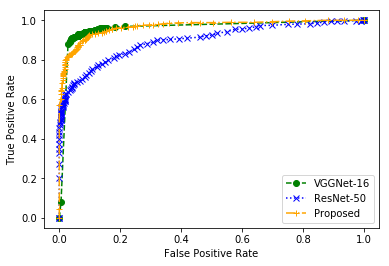

In [32]:
plt.plot(fpr, tpr, color="green", label='VGGNet-16', marker='o', linestyle='--')
plt.plot(fpr_res, tpr_res, color="blue", label='ResNet-50', marker='x', linestyle=':')
plt.plot(fpr_dc, tpr_dc, color="orange", label='Proposed', marker='+', linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig = plt.gcf()
plt.legend()
fig.savefig("D:/newFolder/2019/graph/compare_network_abnormal.png")
plt.show()

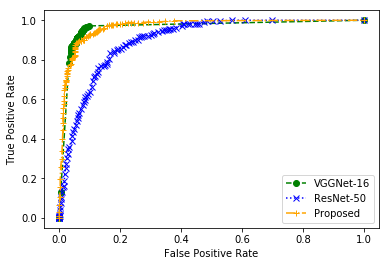

In [33]:
plt.plot(fpr_, tpr_, color="green", label='VGGNet-16', marker='o', linestyle='--')
plt.plot(fpr_res_, tpr_res_, color="blue", label='ResNet-50', marker='x', linestyle=':')
plt.plot(fpr_dc_, tpr_dc_, color="orange", label='Proposed', marker='+', linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig = plt.gcf()
plt.legend()
fig.savefig("D:/newFolder/2019/graph/compare_network_normal.png")
plt.show()